In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
data = pd.read_csv('real_estate_2.csv')

In [3]:
data

,precio,N_dormitorios,N_banos,superficie
0,13.81,3,3,135
1,9.13,3,1,75
2,13.89,4,2,100
3,16.67,3,3,98
4,23.01,4,4,120
...,...,...,...,...
259,4.50,3,2,205
260,4.00,3,2,220
261,5.00,1,1,198
262,6.00,2,2,210


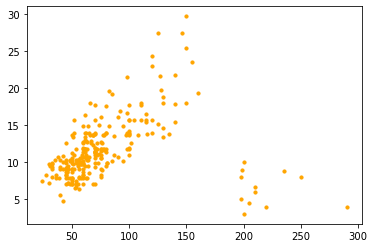

In [4]:
plt.scatter(data.superficie,data.precio,color='orange',s=10)
plt.show()

### Estimaremos una regresion lineal sin tratar los datos, es decir como si no consideraramos que tenemos claros outliers en la base

In [6]:
X = np.column_stack([np.ones_like(data.superficie),data.superficie])

### Estimados el beta con la matriz X

In [9]:
β = np.linalg.lstsq(X,data.precio,rcond=None)[0]
print(β)

[9.53652641 0.02680111]


In [10]:
y_hat = X@β

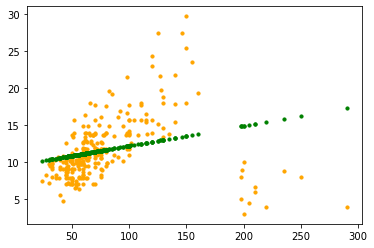

In [12]:
plt.scatter(data.superficie,data.precio,color='orange',s=10)
plt.scatter(data.superficie,y_hat,color='green',s=10)
plt.show()

### Como apreciamos en la figura anterior, los outliers me han desviado completamente la pendiente para la superficie. En el modelo podemos ver que esta es casi cero y por lo tanto me diria erroneamente que el efecto de superficie en precio es muy bajo. Sin embago, graficamente vemos que esto no es asi, sino mas bien se debe a la cola derecha de la distribucion de los datos. 

### Aplicaremos Box and Cox para ver como los datos pueden verse gausianos

Podemos ver que la distribución no se ve bien, multimodal y cargada completamente a la izquierda.


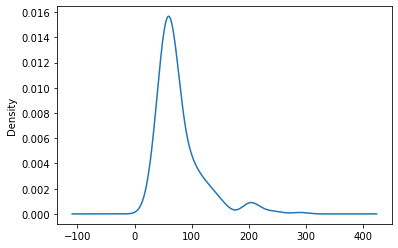

In [15]:
data.superficie.plot(kind='kde')
plt.show()

### Aplicamos logaritmo natural para ver como cambia el kde

Mejora un poco, pero no demasiado


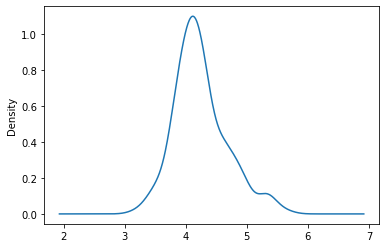

In [18]:
ls = np.log(data.superficie)
ls.plot(kind='kde')
plt.show()

Con skew podemos ver la simetria de nuestra distribución, en una normal perfecta buscamos que el skwe sea 0

In [21]:
data.superficie.skew()

2.162246090380684

In [22]:
ls.skew()

0.7189831341251185

### Ahora realizare la formula de Box and Cox
Este método desarrolla una familia de transformaciones indexadas por un parámetros 𝜆. 


La idea es resolver los problemas generados por la asimetría (skewness) en la distribución de los datos. 


El poseer una muestra  con alta asimetría, implica que la probabilidad de caer a la derecho o izquierda de la media es mayor que en el otro lado. Esto implica mayor concentración de datos en una parte de la distribución.


$x^\lambda = \frac{x^\lambda-1}{\lambda}$

In [34]:
λ = -0.51971
s_bc = (data.superficie**λ-1)/λ

In [35]:
s_bc.skew()

-0.01128390283104779

### Utilizaremos la funcion que optimamente me dice cual es el lambda

In [32]:
from scipy import stats 

-0.5197105829806455


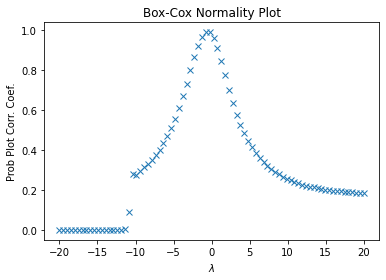

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(data.superficie,-20,20,plot=ax)
_,maxlog = stats.boxcox(data.superficie)
print(maxlog)

### Ahora re escalaremos nuestros datos 

$x_i^r = \frac{x_i-x_{min}}{x_{max}-x_{min}}$

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
Xd = data.values ### Con el comando values estos pasando el dataframe de pandas a numpy 

In [39]:
print(Xd[0:5,:])

[[ 13.81   3.     3.   135.  ]
 [  9.13   3.     1.    75.  ]
 [ 13.89   4.     2.   100.  ]
 [ 16.67   3.     3.    98.  ]
 [ 23.01   4.     4.   120.  ]]


In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
Xr = scaler.fit_transform(Xd)

In [41]:
print(Xr[0:5,:])

[[0.40396114 0.5        0.66666667 0.41729323]
 [0.22907324 0.5        0.         0.19172932]
 [0.40695067 0.75       0.33333333 0.28571429]
 [0.51083707 0.5        0.66666667 0.27819549]
 [0.74775785 0.75       1.         0.36090226]]


### Devolvemos la matriz re escalada a un data frame de pandas 

In [42]:
Xr = pd.DataFrame(Xr,columns= ['precio','N_d','N_b','superficie'])

In [43]:
Xr

,precio,N_d,N_b,superficie
0,0.403961,0.50,0.666667,0.417293
1,0.229073,0.50,0.000000,0.191729
2,0.406951,0.75,0.333333,0.285714
3,0.510837,0.50,0.666667,0.278195
4,0.747758,0.75,1.000000,0.360902
...,...,...,...,...
259,0.056054,0.50,0.333333,0.680451
260,0.037369,0.50,0.333333,0.736842
261,0.074738,0.00,0.000000,0.654135
262,0.112108,0.25,0.333333,0.699248


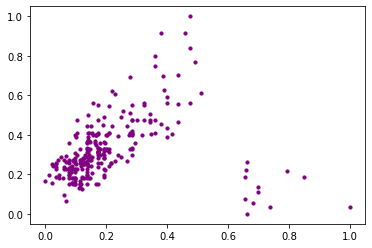

In [44]:
plt.scatter(Xr.superficie, Xr.precio, color='purple',s=10)
plt.show()

### Entonces como reescalar no resuelve el problema de los outliers, vamos a probar la estadarizacion 
$x_i^s = \frac{x_i-\mu_x}{\sigma_x}$

In [45]:
from sklearn.preprocessing import StandardScaler

In [1]:
scaler = StandardScaler().fit(Xd)
Xs = scaler.transform(Xd)

NameError: name 'StandardScaler' is not defined

In [47]:
print(Xs[0:5,:])

[[ 0.53825487  0.55985073  1.94759438  1.4035638 ]
 [-0.60589326  0.55985073 -0.99890944 -0.05602461]
 [ 0.55781296  1.7328713   0.47434247  0.55213723]
 [ 1.23745651  0.55985073  1.94759438  0.50348428]
 [ 2.78743496  1.7328713   3.42084628  1.0386667 ]]


In [48]:
Xs = pd.DataFrame(Xs,columns= ['precio','N_d','N_b','superficie'])

In [49]:
Xs.describe()

,precio,N_d,N_b,superficie
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,-2.977416e-16,-2.640985e-16,2.678834e-16,8.578996e-17
std,1.001899e+00,1.001899e+00,1.001899e+00,1.001899e+00
min,-2.104532e+00,-1.786190e+00,-9.989094e-01,-1.296675e+00
25%,-6.327856e-01,-6.131698e-01,-9.989094e-01,-6.155335e-01
50%,-2.342896e-01,5.598507e-01,4.743425e-01,-3.236158e-01
75%,5.186968e-01,5.598507e-01,4.743425e-01,1.994034e-01
max,4.437649e+00,2.905892e+00,3.420846e+00,5.174167e+00


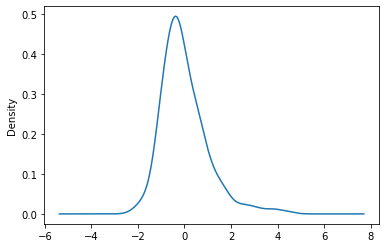

In [50]:
Xs.precio.plot(kind='kde')
plt.show()

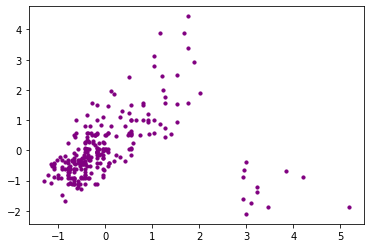

In [51]:
plt.scatter(Xs.superficie,Xs.precio,color='purple',s=10)
plt.show()

### Dado que los dos metodos anteriores no han sido utiles para resolver el problema que tengo al modelar con esos outliers, utilizare mi ultimo recurso que es normalizar

In [52]:
from sklearn.preprocessing import Normalizer

In [2]:
Xd = Xd[:,1:4]
Xd

NameError: name 'Xd' is not defined

In [55]:
scaler = Normalizer().fit(Xd)
Xn = scaler.transform(Xd)

In [56]:
Xn = pd.DataFrame(Xn,columns= ['N_d','N_b','superficie'])

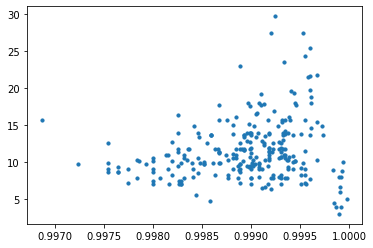

In [59]:
plt.scatter(Xn.superficie,data.precio,s=10)
plt.show()

### Corramos ahora el modelo inicial de este script

In [60]:
XN = np.column_stack([np.ones_like(data.superficie),Xn.superficie])
β_n = np.linalg.lstsq(XN,data.precio,rcond=None)[0]
print(β_n)

[-1279.93633308  1292.90140628]


In [61]:
p_hat_n = XN@β_n

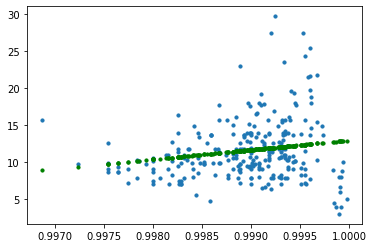

In [64]:
plt.scatter(Xn.superficie,data.precio,s=10)
plt.scatter(Xn.superficie,p_hat_n,color='green',s=10)
plt.show()